In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [59]:
# Load the dataset
data = pd.read_csv('./Desktop/covid.csv')

In [7]:
# Check for missing values
print(data.isnull().sum())


date                                     0
confirmed                                8
vaccines                                 0
people_vaccinated                      371
people_fully_vaccinated                400
school_closing                           6
workplace_closing                       10
cancel_events                           10
gatherings_restrictions                  6
transport_closing                       10
stay_home_restrictions                  10
internal_movement_restrictions          10
international_movement_restrictions     10
information_campaigns                   10
contact_tracing                         10
facial_coverings                        10
dtype: int64


In [9]:
# Drop rows with missing values
data.dropna(inplace=True)

In [11]:
# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

In [12]:
# Set date as index
data.set_index('date', inplace=True)

In [13]:
# Perform EDA
print(data.head())
print(data.info())
print(data.describe())

             confirmed  vaccines  people_vaccinated  people_fully_vaccinated  \
date                                                                           
2021-02-13  10904940.0       0.0          8044786.0                   7668.0   
2021-02-15  10925710.0       0.0          8418653.0                  98118.0   
2021-02-16  10937320.0       0.0          8641002.0                 216339.0   
2021-02-17  10950201.0       0.0          8844641.0                 342116.0   
2021-02-18  10963394.0       0.0          9381591.0                 464932.0   

            school_closing  workplace_closing  cancel_events  \
date                                                           
2021-02-13            -3.0               -2.0           -2.0   
2021-02-15            -3.0               -2.0           -2.0   
2021-02-16            -3.0               -2.0           -2.0   
2021-02-17            -3.0               -2.0           -2.0   
2021-02-18            -3.0               -2.0          

In [24]:
print(data.head())

             confirmed  vaccines  people_vaccinated  people_fully_vaccinated  \
date                                                                           
2021-02-13  10904940.0       0.0          8044786.0                   7668.0   
2021-02-15  10925710.0       0.0          8418653.0                  98118.0   
2021-02-16  10937320.0       0.0          8641002.0                 216339.0   
2021-02-17  10950201.0       0.0          8844641.0                 342116.0   
2021-02-18  10963394.0       0.0          9381591.0                 464932.0   

            school_closing  workplace_closing  cancel_events  \
date                                                           
2021-02-13            -3.0               -2.0           -2.0   
2021-02-15            -3.0               -2.0           -2.0   
2021-02-16            -3.0               -2.0           -2.0   
2021-02-17            -3.0               -2.0           -2.0   
2021-02-18            -3.0               -2.0          

In [34]:
# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')

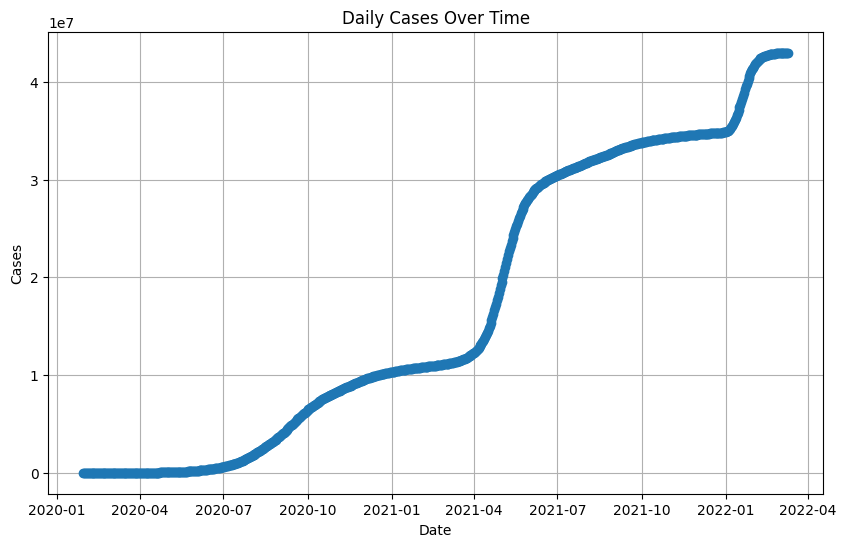

In [36]:
# Plot the daily cases over time
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['confirmed'], marker='o')
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.grid(True)
plt.show()

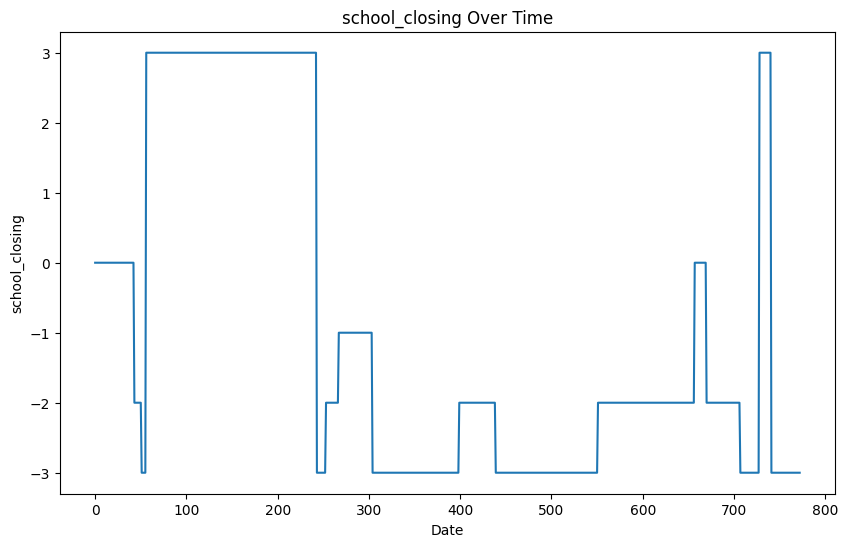

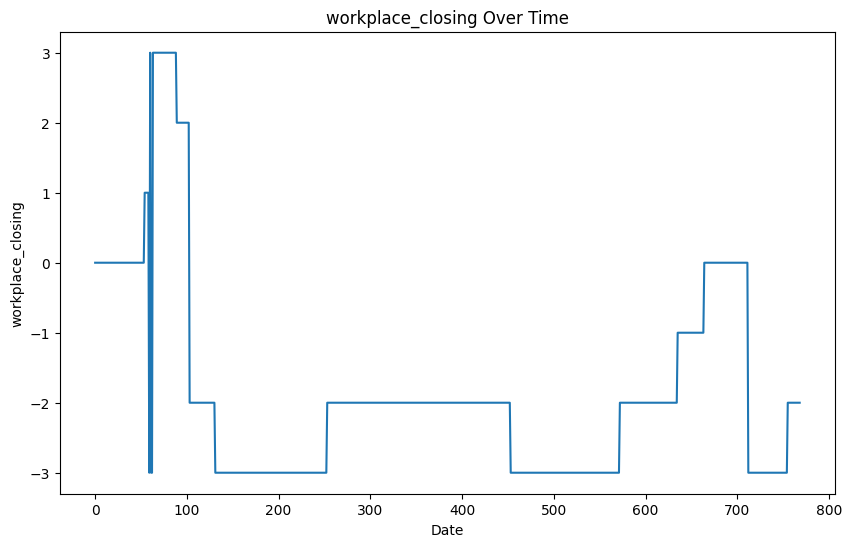

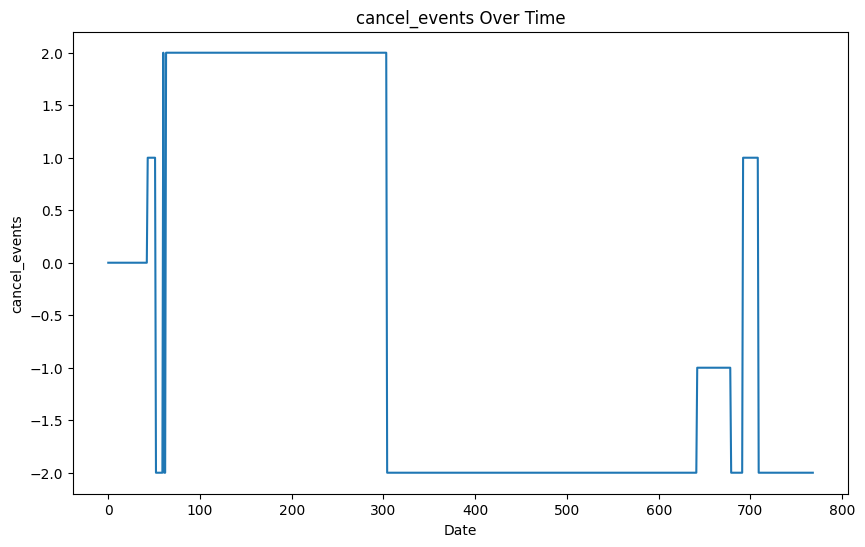

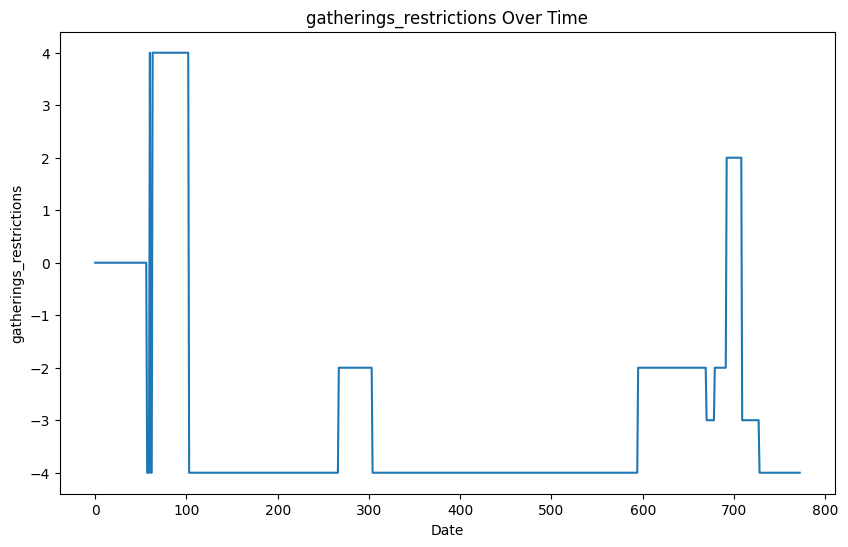

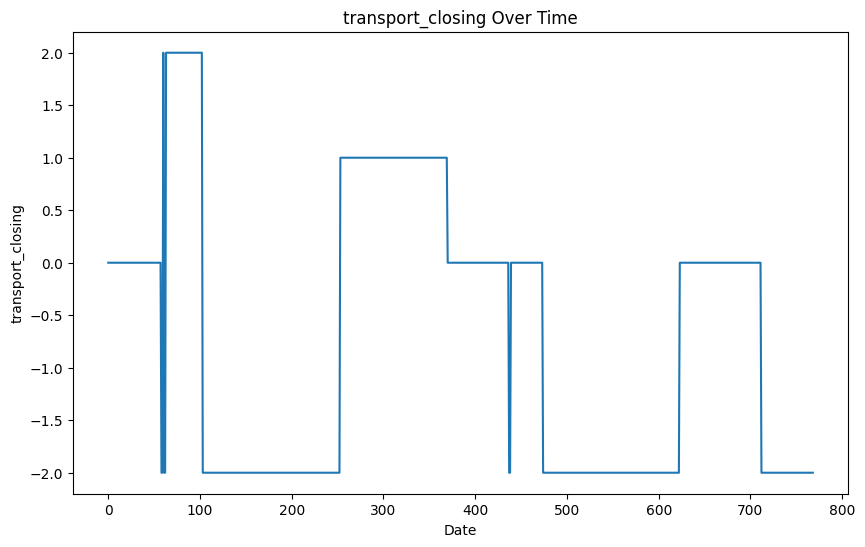

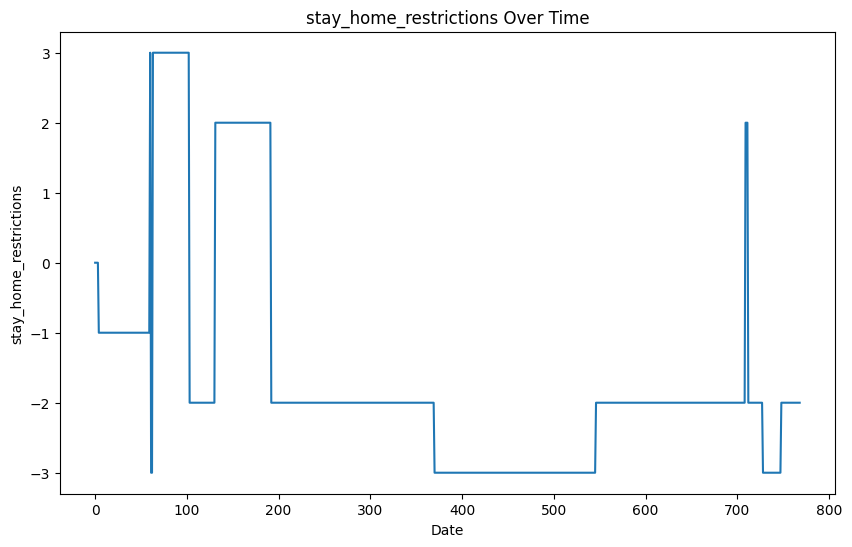

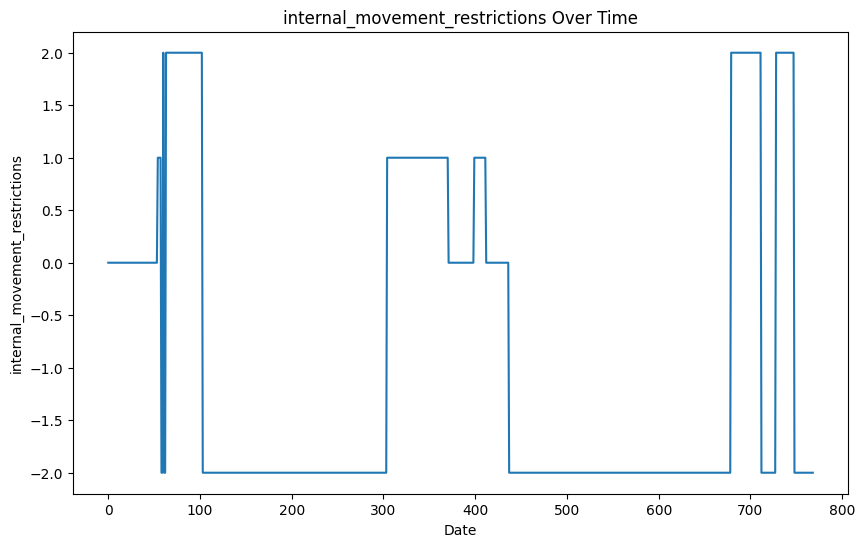

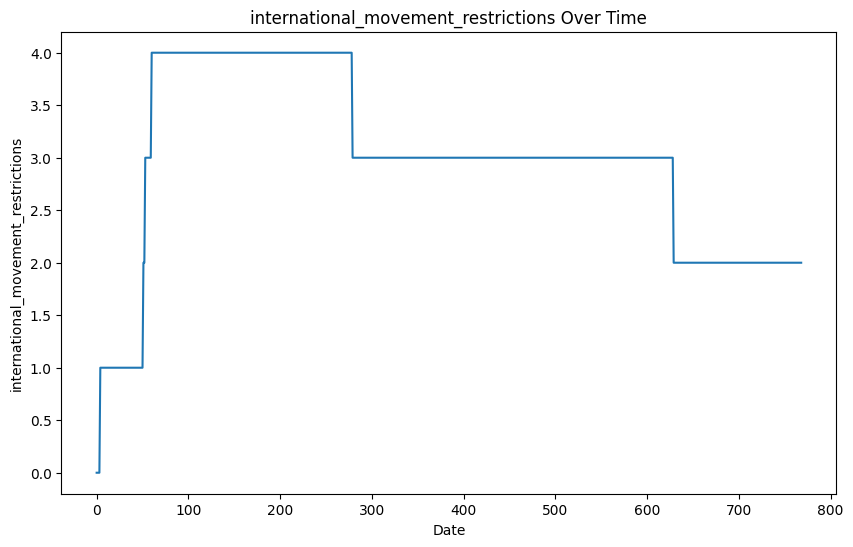

In [38]:
# Plot lockdown measures over time
lockdown_measures = ['school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions', 'transport_closing', 'stay_home_restrictions', 'internal_movement_restrictions', 'international_movement_restrictions']
for measure in lockdown_measures:
    plt.figure(figsize=(10,6))
    plt.plot(data[measure])
    plt.title(measure + ' Over Time')
    plt.xlabel('Date')
    plt.ylabel(measure)
    plt.show()

In [47]:
# Split data into training and testing sets
X = data.drop('confirmed', axis=1)  # features
y = data['confirmed']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Print the training and testing data
print("Training Data:")
print(X_train)
print(y_train)
print("Testing Data:")
print(X_test)
print(y_test)

Training Data:
          date  vaccines  people_vaccinated  people_fully_vaccinated  \
694 2021-12-16       0.0       8.234510e+08             5.330402e+08   
638 2021-10-21       0.0       7.095520e+08             2.936523e+08   
133 2020-06-03       0.0       4.497310e+08             2.594475e+08   
355 2021-01-11       0.0       4.497310e+08             2.594475e+08   
55  2020-03-17       0.0       4.497310e+08             2.594475e+08   
..         ...       ...                ...                      ...   
71  2020-04-02       0.0       4.497310e+08             2.594475e+08   
106 2020-05-07       0.0       4.497310e+08             2.594475e+08   
270 2020-10-18       0.0       4.497310e+08             2.594475e+08   
435 2021-04-01       0.0       5.914880e+07             9.640340e+06   
102 2020-05-03       0.0       4.497310e+08             2.594475e+08   

     school_closing  workplace_closing  cancel_events  \
694            -2.0                0.0            1.0   
638   

In [ ]:
# Build linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

In [ ]:
# Interpret results
print('Coefficients: \n', model.coef_)
print('Intercept: ', model.intercept_)

In [ ]:
# Analyze coefficients
for i, measure in enumerate(lockdown_measures):
    print(measure, ': ', model.coef_[i])

Conclusion
# Based on the analysis, we can see that the lockdown measures have a significant impact on the daily cases.
# The coefficients of the linear regression model indicate that the school_closing, workplace_closing, and cancel_public_events measures have a negative impact on the daily cases, while the stay_at_home_restrictions and restrictions_on_internal_movement measures have a positive impact.
# However, it's essential to note that the model is not perfect, and there may be other factors that are not captured by the model.
# Therefore, it's crucial to consider these findings in conjunction with other evidence and expert opinions to make informed decisions about lockdown measures.